In [1]:
import numpy as np
import scipy.special
import cvxpy as cp

from scipy.optimize import minimize

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ, execute
from qiskit.circuit import Parameter
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from src import QAOA_utilities as QAOAut
from src import CellFreeQAOA as CFQAOA

import matplotlib.pyplot as plt

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [2]:
M = 3 # number of cells
K = 6 # number of users
rho = 1 # max power
BW_max = 7 # max BW, M_hat in paper
rng = np.random.default_rng(270395)

AP_locations = rng.random((2,M))
US_locations = rng.random((2,K))

In [3]:
def generate_model(AP_locations, US_locations):
    D = np.zeros((M,K))
    G = np.zeros((M,K))
    B = np.zeros((M,K))
    A = np.zeros((M,K))
    PSI = 1/100*np.ones((K,K)) + 99/100*np.eye(K)
    for m in range(M):
        Aden = 1
        for k in range(K):
            D[m,k] = np.sqrt( (AP_locations[0,m] - US_locations[0,k])**2 + (AP_locations[1,m] - US_locations[1,k])**2 )
            G[m,k] = 1/D[m,k]
            B[m,k] = 1/(D[m,k]**2)
            A[m,k] = B[m,k]**2
            Aden += B[m,k]*PSI[m,k] 
        A[m,:] = A[m,:]/Aden
    return([D,B,A])

D,Beta,Alpha = generate_model(AP_locations,US_locations)

eta = rng.random(K)

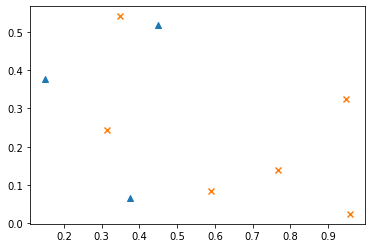

In [4]:
plt.scatter(AP_locations[0,:],AP_locations[1,:], marker = '^')
plt.scatter(US_locations[0,:],US_locations[1,:], marker = 'x')

In [5]:
lambda_lagrange = 1/K * np.ones((K,1))

----------------------------------------------------------------------------------------
Let's now consider the different strategies to choose $\lambda$ for a fixed $t$.
------------------------------------------------------------------------------------------------------

In [6]:
t_vec = 10**(np.array([-2,-1, 0])/10)

In [7]:
def plot_k_user_services(X_QAOA, title):
    
    US_served_loc = US_locations[:,served==1]
    for m in range(len(AP_locations[0,:])):
        for k in range(len(US_served_loc[0,:])):
            if abs(X_QAOA[m,k] - 1) < 10**(-8):
                last_m = m
                last_k = k
                plt.plot([AP_locations[0,m],US_served_loc[0,k]], [AP_locations[1,m],US_served_loc[1,k]], linestyle='dashed', linewidth=0.2, color='blue')
            
    plt.scatter(US_locations[0,:], US_locations[1,:, ],marker = 'x', color = 'green', label = 'User')
    plt.scatter(US_served_loc[0,:],US_served_loc[1,:], facecolors='none', color = 'blue', label = 'Served User')
    plt.scatter(AP_locations[0,:],AP_locations[1,:], marker = '^', color='red', s = 120, label='AP')
    plt.plot([AP_locations[0,last_m],US_served_loc[0,last_k]], [AP_locations[1,last_m],US_served_loc[1,last_k]], linestyle='dashed', linewidth=0.2, color='blue', label='Active links') # legend purposes
    plt.legend(loc="upper right")
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.axis([0, 1.2, 0, 1.2])
    plt.axis('square')
    plt.title(title)
    #plt.show()
    plt.savefig('/home/alb/Scrivania/Quantum/Projects/Applications/QAOA-CellFreeMIMO/results/Plots/'+title+'.png')
    plt.show()
    return 0

----- Starting QAOA -----
COBYLA optimization result:  [ 0.24052106  1.43136166 -0.05376351  0.04891054  0.02055105  0.34027392]
v best =  3
[[1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1.]]
[ 4.17868671e+05  1.60570487e+03 -1.12164371e+02  5.90980478e+03
 -4.97057608e+01 -3.33591198e+01]
removing =  [0. 0. 0. 0. 1. 0.]
 - currently serving:  [1. 1. 1. 1. 0. 1.]
----- Starting QAOA -----
COBYLA optimization result:  [0.33623115 0.3328648  0.32319299 0.37317015 0.35571544 0.33359532]
v best =  6
[[0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0.]]
[ 6.38025780e+05  1.53251649e+03 -1.35220490e+02  1.12348651e+04
 -1.78004085e+01]
removing =  [0. 0. 0. 0. 1.]
 - currently serving:  [1. 1. 1. 1. 0. 0.]
----- Starting QAOA -----
COBYLA optimization result:  [0.48725557 0.42557185 0.10965357 0.50860621 0.22592148 0.3953652 ]
v best =  7
[[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 1. 1. 0.]]
[ 4.58844724e+05  1.21959913e+03 -1.20227399e+02  9.27394482e+03]
removing =  [0. 0. 0. 0.]
 - 

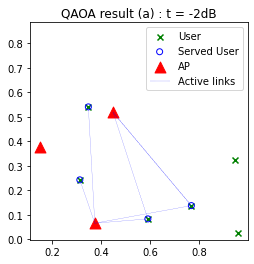

t =  0.6309573444801932
best served =  4.0
avg served =  1.6953125
avg SINR =  [26.10406824  1.01408897  0.0500786   3.40866417]
----------------------------------------------------
----- Starting QAOA -----
COBYLA optimization result:  [0.3425361  1.44269291 0.33906488 0.33785824 0.35856499 0.3136566 ]
v best =  4
[[0. 0. 0. 1. 1. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]
[ 7.62667758e+05  9.26650371e+02 -1.10293408e+02  1.15803593e+04
 -8.59089478e+01 -2.92195568e+01]
removing =  [0. 0. 0. 0. 0. 1.]
 - currently serving:  [1. 1. 1. 1. 1. 0.]
----- Starting QAOA -----
COBYLA optimization result:  [ 0.05531306  0.4120294   1.56134383 -0.04179588 -0.46111346 -0.31069777]
v best =  4
[[1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 1. 0. 0.]]
[ 6.86155635e+05  1.04062889e+03 -1.56820044e+02  1.60584800e+04
 -6.65506204e+01]
removing =  [0. 0. 0. 0. 0.]
 - currently serving:  [1. 1. 1. 1. 1. 0.]


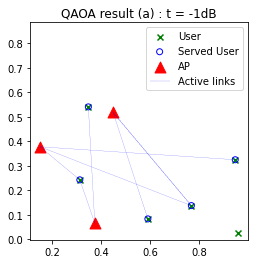

t =  0.7943282347242815
best served =  5.0
avg served =  2.455078125
avg SINR =  [3.00495495e+01 7.57384682e-01 4.44737220e-02 4.33745207e+00
 1.05139182e-02]
----------------------------------------------------
----- Starting QAOA -----
COBYLA optimization result:  [0.33225534 1.32130334 1.41003633 0.31530023 0.31295564 0.20553785]
v best =  3
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]]
[ 6.51767301e+05  1.37322840e+03 -1.42215910e+02  5.61270579e+03
 -4.62430069e+01 -5.94860392e+01]
removing =  [0. 0. 0. 0. 1. 0.]
 - currently serving:  [1. 1. 1. 1. 0. 1.]
----- Starting QAOA -----
COBYLA optimization result:  [0.33221172 0.32164726 0.34204585 0.33338611 0.33552852 0.32762003]
v best =  4
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0.]]
[ 7.36745171e+05  6.05331682e+02 -1.86035766e+02  7.84003582e+03
 -4.75335305e+01]
removing =  [0. 1. 0. 0. 0.]
 - currently serving:  [1. 0. 1. 1. 0. 1.]
----- Starting QAOA -----
COBYLA optimization result:  [1.3339294  1.3

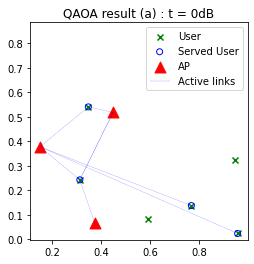

t =  1.0
best served =  4.0
avg served =  1.3251953125
avg SINR =  [3.36459990e+01 4.66145615e-02 9.95491164e+00 7.33178278e-03]
----------------------------------------------------


In [8]:
nservedvec = np.zeros(len(t_vec))
minSINRvec = np.zeros(len(t_vec))
for k in range(len(t_vec)):
    t = t_vec[k]
    
    old_served = np.zeros(K)
    served = np.ones(K)
    lambda_lagrange_p = np.copy(lambda_lagrange)
    while(sum(old_served - served) != 0):
        old_served = np.copy(served)
        Alpha_p = Alpha[:,served==1]
        Beta_p = Beta[:,served==1]
        eta_p = eta[served==1]

        X_QAOA, avgSINR, avgserved, avgconvalues, counts = CFQAOA.optimize_links_fixedt(BW_max, rho, eta_p, Alpha_p, Beta_p, t, lambda_lagrange_p)
    
        print(X_QAOA)
        print(avgconvalues)
        removing = np.zeros(int(sum(old_served)))
        for ik in range(int(sum(old_served))):
            removing[ik] = 1 - min(np.floor(sum(X_QAOA[:,ik])),1)
            #if(served[ik] > 0): 
            #removing[int(sum(served[:ik]))] = 1 - min(np.floor(sum(X_QAOA[:,int(sum(served[:ik]))])),1)
            
        served[served == 1] = served[served==1] - removing
        
        print('removing = ', removing)
        gamma_vec = avgSINR
        #gamma_vec = gamma_vec - np.mean(gamma_vec) # (c) option
        #lambda_lagrange_p = gamma_vec[removing==0]/sum(gamma_vec[removing==0]) # (b) or (c) option
        lambda_lagrange_p = 1/np.abs(avgconvalues[removing==0]) # (a)
        lambda_lagrange_p = lambda_lagrange_p/np.sum(lambda_lagrange_p) # (a)
        print(' - currently serving: ', served)
        
    plot_k_user_services(X_QAOA, 'QAOA result (a) : t = '+str(round(10*np.log10(t))) + 'dB')
        
    print('t = ', t)
    print('best served = ', sum(served))
    print('avg served = ', avgserved)
    nservedvec[k] = avgserved
    print('avg SINR = ', avgSINR)
    minSINRvec[k] = min(avgSINR)
    print('----------------------------------------------------')
        

## Plots

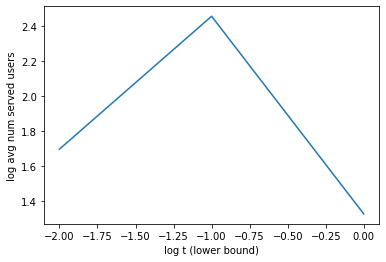

In [9]:
plt.plot(10*np.log10(t_vec), nservedvec)
plt.xlabel('log t (lower bound)')
plt.ylabel('log avg num served users')
plt.show()

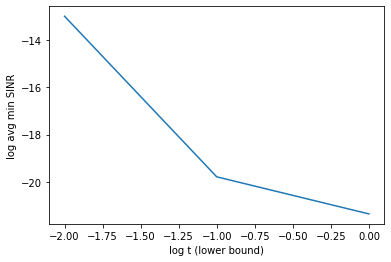

In [10]:
plt.plot(10*np.log10(t_vec), 10*np.log10(minSINRvec))
plt.xlabel('log t (lower bound)')
plt.ylabel('log avg min SINR')
plt.show()

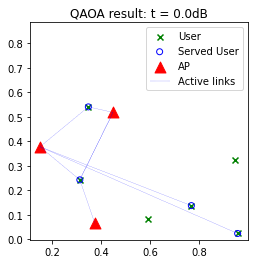

0

In [11]:
plot_k_user_services(X_QAOA, 'QAOA result: t = '+str(10*np.log10(t)) + 'dB'  )

In [12]:
print(zip(AP_locations))

In [13]:
for m in range(len(AP_locations[0,served==1])):
    plot(m)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 3 but corresponding boolean dimension is 6

1) Average connectivity over QAOA outputs
2) Optimize lambda classically (alternate optimization)
3) "Monte Carlo" over network params